## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/home/z/projects/draculab


In [2]:
# This is the name of the file where logging will happen
log_file = "./logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")

In [3]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [12]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [4]:
# Creating input patterns
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, random=True):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]
#for i in range(6):
#    print(np.reshape(inp_pat(5, 4, 2),(5,5)))

In [5]:
# Setting parameters
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Adjusting size of e,i groups.")
ei_runner.set_param('e_geom', 'rows', 16)
ei_runner.set_param('e_geom', 'columns', 16)
ei_runner.set_param('i_geom', 'rows', 8)
ei_runner.set_param('i_geom', 'columns', 8)
ei_runner.annotate("Compensating for the ratio of excitatory to inhibitory units.")
ei_runner.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -0.01}})
ei_runner.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
ei_runner.annotate("Setting input parameters")
ei_runner.set_param('x_geom', 'rows', 5) 
ei_runner.set_param('x_geom', 'columns', 5) 
ei_runner.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
ei_runner.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
ei_runner.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
ei_runner.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#----------------------------------
ei_runner.annotate("Using Oja input synapses")
ei_runner.set_param('xe_syn', 'type', synapse_types.oja)
ei_runner.set_param('xe_syn', 'lrate', 1./100.)
ei_runner.set_param('xi_syn', 'type', synapse_types.oja)
ei_runner.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
ei_runner.annotate("Using BCM EE synapses")
ei_runner.set_param('ee_syn', 'type', synapse_types.bcm)
ei_runner.set_param('ee_syn', 'lrate', 1./100.)
#ei_runner.set_param('ee_syn', 'omega', 2.)
#----------------------------------
ei_runner.annotate("Using corr_homeo_inhib IE synapses")
ei_runner.set_param('ie_syn', 'type', synapse_types.corr_inh)
ei_runner.set_param('ie_syn', 'lrate', 1./50.)
ei_runner.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
ei_runner.annotate("Using anti_cov_pre EI synapses")
ei_runner.set_param('ei_syn', 'type', synapse_types.anticov_pre)
ei_runner.set_param('ei_syn', 'lrate', .01)
#----------------------------------
"""
ei_runner.annotate('Using exp_rate_dist ee synapses.')
ei_runner.set_param('ee_syn', 'type', synapse_types.exp_rate_dist)
ei_runner.set_param('ee_syn', 'lrate', 1.)
ei_runner.set_param('ee_syn', 'wshift', 10.)
ei_runner.set_param('ee_syn', 'c', 2.)
"""
#----------------------------------

ei_runner.annotate("Using exp_dist_sig units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('e_pars', 'tau_scale', 0.001)
ei_runner.set_param('e_pars', 'c', 3.)
ei_runner.set_param('e_pars', 'Kp', .02)
"""
ei_runner.annotate("Using exp_dist_sig units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('i_pars', 'tau_scale', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)
ei_runner.set_param('i_pars', 'Kp', .02)
"""
#----------------------------------
"""
ei_runner.annotate("Using exp_dist_sig_thr units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('e_pars', 'tau_thr', 0.005)
ei_runner.set_param('e_pars', 'c', 3.)

ei_runner.annotate("Using exp_dist_sig_thr units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('i_pars', 'tau_thr', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)
"""
#----------------------------------
ei_runner.set_param('n', 'w_track', 16)
#----------------------------------
ei_runner.build()

In [6]:
# Simulating
n_pres = 20
pres_time = 1.
ei_runner.run(n_pres, pres_time, set_inp_pat=inp_pat)

Presentation 0 took 62.08416247367859 seconds.
Presentation 1 took 59.65676188468933 seconds.
Presentation 2 took 64.9706814289093 seconds.
Presentation 3 took 64.63305330276489 seconds.
Presentation 4 took 59.2710542678833 seconds.
Presentation 5 took 74.26226210594177 seconds.
Presentation 6 took 56.15499424934387 seconds.
Presentation 7 took 55.51420259475708 seconds.
Presentation 8 took 54.88870334625244 seconds.
Presentation 9 took 54.80144643783569 seconds.
Presentation 10 took 56.775010108947754 seconds.
Presentation 11 took 63.03408598899841 seconds.
Presentation 12 took 81.10983800888062 seconds.
Presentation 13 took 54.69762349128723 seconds.
Presentation 14 took 56.42305111885071 seconds.
Presentation 15 took 67.79605650901794 seconds.
Presentation 16 took 53.995551347732544 seconds.
Presentation 17 took 52.33436465263367 seconds.
Presentation 18 took 51.73891615867615 seconds.
Presentation 19 took 52.81076669692993 seconds.
Total execution time is 1196.9644193649292 seconds

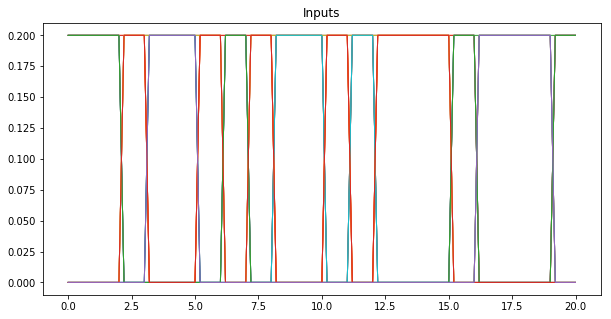

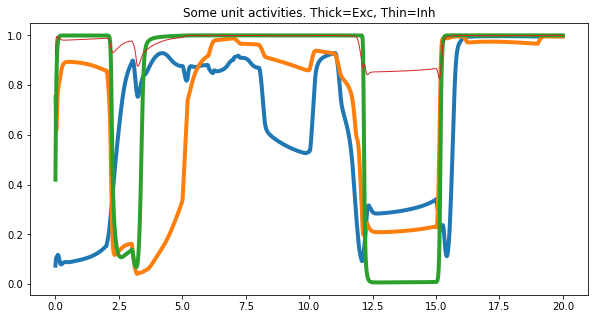

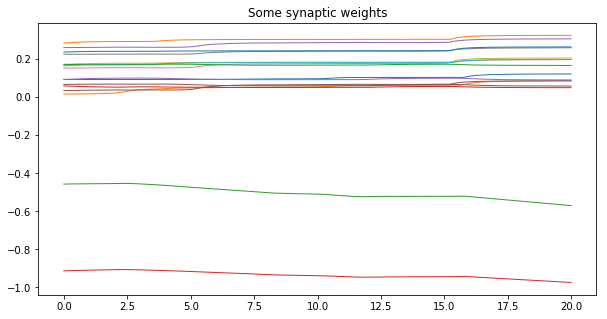

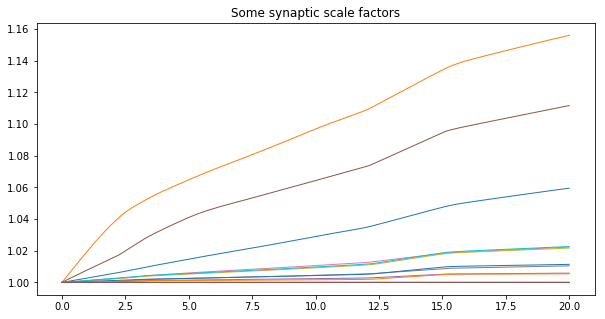

In [7]:
%matplotlib inline
ei_runner.basic_plot()

In [12]:
ei_runner.double_anim(ei_runner.e+ei_runner.x, slider=False, interv=20, nbins=20, thr=0.9, pdf=True)

[153 166   3   2]


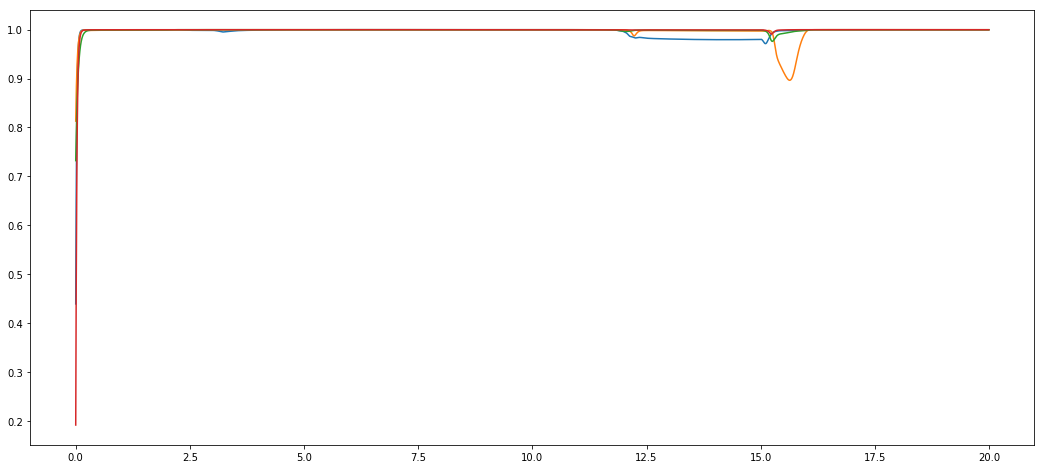

In [8]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 4  # how many units to plot
top_pop = np.array(ei_runner.e)  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

[29 55 42]


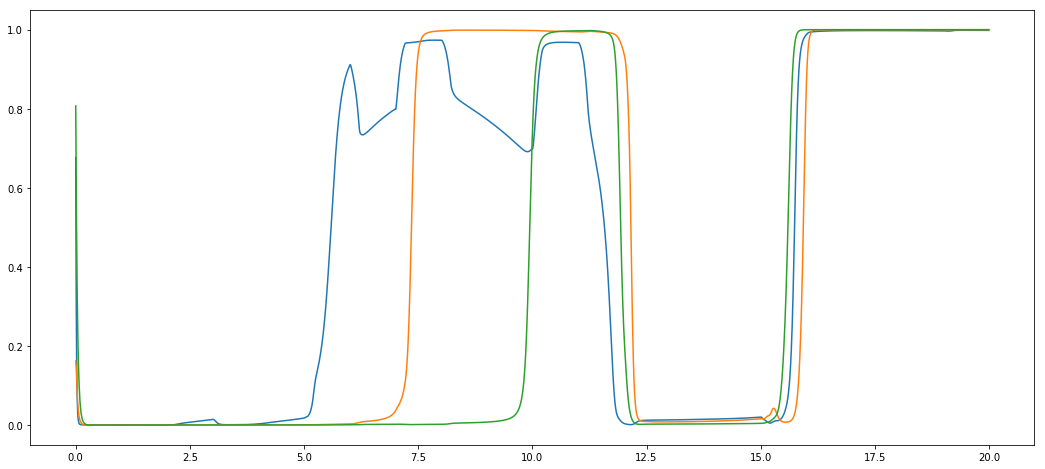

In [9]:
# Plot the lowest excitatory unit activities
n_bottom = 4  # how many units to plot
bottom_pop = np.array(ei_runner.e)  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [20]:
# Annotations and log
ei_runner.annotate('Redoing the first simulation of this day, this time with the update based on the  ', make_history=False)
ei_runner.annotate('solution of the logistic differential equation for the scale factors.', make_history=False)
ei_runner.annotate('After a bunch of presentations the result was that the network would switch between ', make_history=False)
ei_runner.annotate('episodes where it would approach the exponential distribution, and episodes where ', make_history=False)
ei_runner.annotate('all units would become active.', make_history=False)
ei_runner.annotate('Perhaps this is an issue of parameters. ', make_history=False)
#ei_runner.annotate('The second caveat is that the number of highly activated units can vary a lot between', make_history=False)
#ei_runner.annotate('patterns. This could be a feature rather than a flaw.', make_history=False)
#ei_runner.annotate('', make_history=False)
ei_runner.log(name=log_file,params=False)

In [ ]:
ei_runner.history

In [ ]:
ei_runner.conn_anim(ei_runner.x, ei_runner.e, slider=True, weights=True)

In [ ]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

In [ ]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()

In [ ]:
import sys
sys.setrecursionlimit(5000)
ei_runner.save(name="save_test2.pkl")
#ei_runner.save(name="ei_runner_select1.pkl")